# Gradient Descent Algorithms

### Hypothesis

$h_\theta(x) = \theta^Tx$

### Cost Function

$J(\theta) = \frac1{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$

## Batch

Update $\theta$ based on all training samples until cost converges.

$\theta_j := \theta_j - \frac\partial{\partial\theta_j}J(\theta)$

or

$\theta_j := \theta_j - \alpha\frac1{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$

### Python

theta:  [49.47 2.50 0.33 0.45 -2.69]
prediction:  44.1179369491


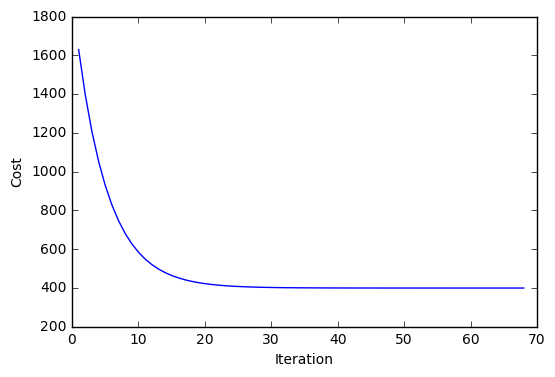

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

def gd_batch(data, alpha, delta_min):
    # Arrange data
    m, n = data[:,0:-1].shape
    X = np.ones((m,n+1))
    X[:,1:] = data[:,0:-1]
    
    # Initialize variables
    theta = np.zeros(n + 1)
    delta = float("inf")
    cost_hist = [float("inf")]
    
    # Run algorithm
    while delta > delta_min:
        # calculate gradient
        loss = X.dot(theta) - data[:,-1]
        gradient = X.T.dot(loss) / m
        
        # update parameter estimates
        theta = theta - alpha * gradient

        # calculate cost, test convergence
        cost = np.sum(np.square(loss)) / (2 * m)
        delta = cost_hist[-1] - cost
        cost_hist.append(cost)
    return theta, cost_hist

# Generate test data
data_raw = np.random.randint(100, size=(1000, 5))

# Normalize data
X = data_raw[:,0:-1]
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
data_norm = np.copy(data_raw)
data_norm[:,:-1] = (X - mu) / sigma

# Initialize model arguments
delta_min = 10**-3
alpha = 0.1

theta, cost_hist = gd_batch(data_norm, alpha, delta_min)
end = time.time()
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
print('theta: ', theta)

# make prediction for comparison with other algorithms
x = np.ones(data_raw.shape[1])
x_norm = np.ones(data_raw.shape[1])
x[1:] = np.array([20, 40, 60, 80])
x_norm[1:] = (np.array([20, 40, 60, 80]) - mu ) / sigma
print('prediction: ', theta.T.dot(x_norm))

# plot cost versus iteration
def plot_costs(c):
    plt.plot(c)
    plt.ylabel('Cost')
    plt.xlabel('Iteration')
    plt.show()
plot_costs(cost_hist)

## Normal Equation

Analytical solution for $\theta = (X^TX)^{-1}X^Ty$.

$O(n^3)$ vs. $O(n^2)$ for iterative solution. Ok for up to approximately $n = 10^5$ features.

Does not benefit from normalization.

### Python


In [3]:
from numpy.linalg import inv

def gd_normal_eq(data):
    m, n = data[:,0:-1].shape
    X = np.ones((m,n+1))
    X[:,1:] = data[:,0:-1]
    return inv(X.T.dot(X)).dot(X.T).dot(data[:,-1])

theta = gd_normal_eq(data_raw)
print('theta: ', theta)
print('prediction: ', theta.T.dot(x))

theta:  [53.65 -0.02 -0.03 0.00 -0.02]
prediction:  51.1481387741


### J

``` J
NB. Takes an m x n matrix of numerical values
NB. with training examples (X) in columns 1 through n-1 and
NB. outcomes in column n as its argument and returns
NB. a 1 x n+1 vector of model parameters.

    gd_normal_eq =: 3 : 0
X =: (#y) $ 1 ,. (<a:;<<_1) { y
dot =: (+/ . *)
theta =: (%.(|:X) dot X) dot (|:X) dot (<a:;_1) { y
)
```

## Stochastic

Update $\theta$ based on **each** training sample until cost converges.

$\theta_{i+1} := \theta_{i} - \alpha\frac1{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$

### Python

theta:  [45.09 1.63 4.64 3.73 6.10]
prediction:  49.5010932735


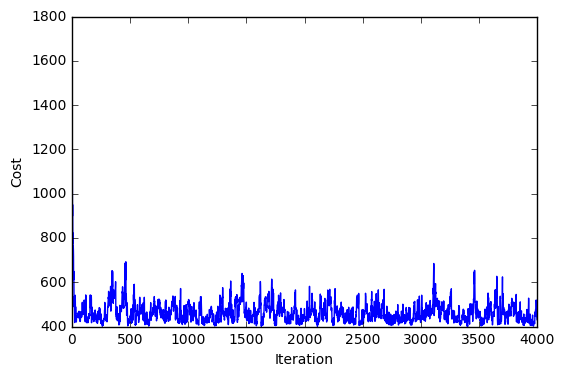

In [16]:
def gd_stoch(data, alpha, delta_min):
    m, N = data.shape
    Xy = np.ones((m,N+1))
    Xy[:,1:] = data
    theta = np.zeros(N)
    delta = float("inf")
    cost_hist = [float("inf")]
    while delta > delta_min:
        np.random.shuffle(Xy)
        for x_i, y_i in ((row[:-1],row[-1]) for row in Xy):
            loss_i = theta.T.dot(x_i) - y_i
            gradient = x_i.T.dot(loss_i)
            theta = theta - alpha * gradient
            loss = Xy[:,:-1].dot(theta) - Xy[:,-1]
            cost = np.sum(np.square(loss)) / (2 * m)
            cost_hist.append(cost)
        delta = cost_hist[-m] - cost_hist[-1] # this isn't quite right - should use min over prior iteration
    return theta, cost_hist

theta, cost_hist = gd_stoch(data_norm, alpha, delta_min)
print('theta: ', theta)
print('prediction: ', theta.T.dot(x_norm))
plot_costs(cost_hist)

## Mini-Batch

### Python

theta:  [49.85 2.41 0.39 0.71 -2.99]
prediction:  44.3422480883


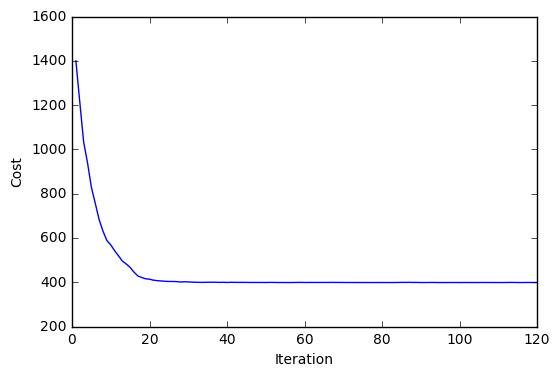

In [17]:
def get_indexB(Xy, sizeB):
    i = 0
    while i < int(Xy.shape[0] / sizeB):
        indexB = slice(i*sizeB, min((i+1)*sizeB, Xy.shape[0]), 1)
        yield (Xy[indexB,:-1], Xy[indexB,-1])
        i += 1

def gd_stoch(data, alpha, sizeb, delta_min):
    m, N = data.shape
    Xy = np.ones((m,N+1))
    Xy[:,1:] = data
    theta = np.zeros(N)
    delta = float("inf")
    cost_hist = [float("inf")]
    while delta > delta_min:
        np.random.shuffle(Xy)
        for Bx, By in get_indexB(Xy, sizeb):
            gradient = Bx.T.dot(Bx.dot(theta) - By) / Bx.shape[0]
            theta = theta - alpha * gradient
            loss = Xy[:,:-1].dot(theta) - Xy[:,-1]
            cost = np.sum(np.square(loss)) / (2 * m)
            delta = cost_hist[-1] - cost
            cost_hist.append(cost)
    return theta, cost_hist

sizeB = 50

theta, cost_hist = gd_stoch(data_norm, alpha, sizeB, delta_min)
print('theta: ', theta)
print('prediction: ', theta.T.dot(x_norm))
plot_costs(cost_hist)

## Adaptive Gradient Algorithm (Adagrad)

[Duchi, J., Hazan, E., and Singer, Y. Adaptive Subgradient Methods for Online Learning and Stochastic Optimization](http://stanford.edu/~jduchi/projects/DuchiHaSi10_colt.pdf)

theta:  [45.05 2.87 0.48 0.56 -2.89]
prediction:  39.0901853626


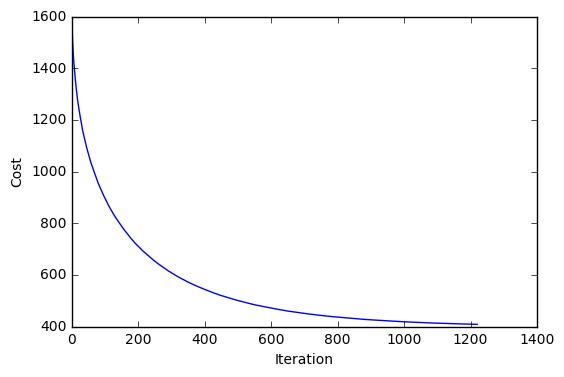

In [18]:
def gd_adagrad(data, alpha, epsilon, sizeb, delta_min):
    m, N = data.shape
    Xy = np.ones((m,N+1))
    Xy[:,1:] = data
    theta = np.ones(N)
    delta = float("inf")
    grad_hist = 0
    cost_hist = [float("inf")]
    while delta > delta_min:
        np.random.shuffle(Xy)
        for Bx, By in get_indexB(Xy, sizeb):
            gradient = Bx.T.dot(Bx.dot(theta) - By) / By.shape[0]
            grad_hist += np.square(gradient)
            theta = theta - alpha * gradient / (epsilon + np.sqrt(grad_hist))
            loss = Xy[:,:-1].dot(theta) - Xy[:,-1]
            cost = np.sum(np.square(loss)) / (2 * m)
            delta = cost_hist[-1] - cost
            cost_hist.append(cost)
    return theta, cost_hist

alpha = alpha*10
epsilon = 10**-8
sizeb = 50

theta, cost_hist = gd_adagrad(data_norm, alpha, epsilon, sizeb, delta_min)
print('theta: ', theta)
print('prediction: ', theta.T.dot(x_norm))
plot_costs(cost_hist)

## Adaptive Moment Estimation (Adam)

[Kingma, D. P., & Ba, J. L. (2015). Adam: A Method for Stochastic Optimization. International Conference on Learning Representations.](https://arxiv.org/pdf/1412.6980v8.pdf)

theta:  [49.38 2.91 0.38 -0.05 -2.89]
prediction:  43.1963678826


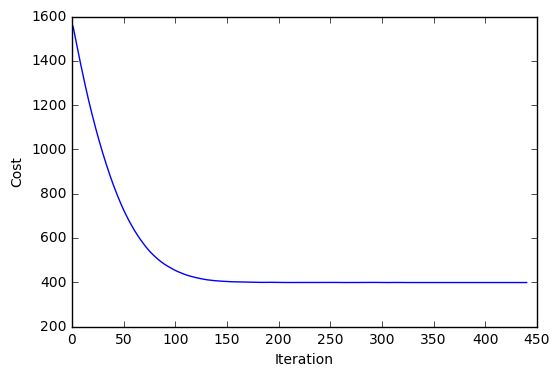

In [45]:
def gd_adam(data, alpha, epsilon, beta1, beta2, sizeB, delta_min):
    # Arrange data
    m, N = data.shape
    Xy = np.ones((m,N+1))
    Xy[:,1:] = data
    
    #Initialize variables
    theta = np.ones(N)
    moment1 = np.zeros(N)
    moment2 = np.zeros(N)
    delta = float("inf")
    cost_hist = [float("inf")]
    i = 1
    
    # Perform optimization
#     while i < 1000:
    while delta > delta_min:
        # Randomize order of data        
        np.random.shuffle(Xy)
        
        # Update parameters for each batch
        for Bx, By in get_indexB(Xy, sizeb):
            # Calculate gradient
            gradient = Bx.T.dot(Bx.dot(theta) - By) / By.shape[0]
            
            # Update moment estimates
            moment1 = beta1 * moment1 + (1 - beta1) * gradient
            moment2 = beta2 * moment2 + (1 - beta2) * np.square(gradient)
            moment1_hat = moment1 / (1 - beta1**i)
            moment2_hat = moment2 / (1 - beta2**i)
            
            # Update paramters
            theta = theta - alpha * moment1_hat / (epsilon + np.sqrt(moment2_hat))

            # Calculate cost, test convergence
            loss = Xy[:,:-1].dot(theta) - Xy[:,-1]
            cost = np.sum(np.square(loss)) / (2 * m)
            delta = cost_hist[-1] - cost
            cost_hist.append(cost)
            i += 1
    return theta, cost_hist

# Initialize algorithm arguments
beta1 = 0.9
beta2 = 0.999

# Run algorithm
theta, cost_hist = gd_adam(data_norm, alpha, epsilon, beta1, beta2, sizeB, delta_min)
print('theta: ', theta)
print('prediction: ', theta.T.dot(x_norm))
plot_costs(cost_hist)

## Resources

[Wikipedia. Gradient descent.](https://en.wikipedia.org/wiki/Gradient_descent)

[Wikipedia. Stochastic gradient descent.](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

[Ruder, Sebastian (2016). An overview of gradient descent optimization algorithms.](http://sebastianruder.com/optimizing-gradient-descent/)

[Shaul, T., Antonoglou, .I, Silver, D. Unit Tests for Stochastic Optimization.](https://arxiv.org/pdf/1312.6055v3.pdf)
